Change root directory

In [17]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


Import libraries

In [18]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot
from src import helmCoils_optmizer as opt


Initial square spire Simulation in X-Axis

In [19]:
number_of_spires = 4
size_length =  0.72
distance_among_spires = 0.46
turns = 30
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)

# Simulation settings
parallel_coils = 150
batch_Size = 120
#grid_length_size = 0.01 #Space among evaluation points
grid_length_size = 0.01
num_seg = 100           #Numer of segments 

In [20]:
##Spawn spires
spires_x_sq = X_coil.square_spires(num_seg)

In [21]:
f0 = None
f0 = hplot.plot_spires(f0, spires_x_sq, color='black', row=None, col=None)

# Plot the square spires
f0.show()

In [ ]:
# Generar grid
X, Y, Z = sim.generate_range([-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2],step_size_x = grid_length_size)
print(X.shape)
print(Y.shape)
print(Z.shape)


(5419,)


In [39]:

hplot.plot_grid(X, Y, Z, f0)

Optimization Problem

In [23]:
# Make sure that Ax, X, Y, Z, and test_3 functions are properly defined in your environment.
optimizer = opt.HelmholtzOptimizer(
    desired_size = 0.30,          # 30e-2 is 0.30 m
    coil = X_coil,
    fun = X_coil.square_spires,
    #fun = X_coil.circular_spires,
    fix_L=False,
    fixed_L_value=2.0,          # Set a fixed value for L if needed
    grid_length_size=grid_length_size,
    population = 20,
    generations = 100,
    mutation = 0.8
)
optimizer.optimize()

gen	nevals	min	avg    
0  	20    	0.1	2000.08
1  	18    	0.03	1000.09
2  	15    	0.03	1000.08
3  	16    	0.03	500.074
4  	19    	0.03	1250.05
5  	19    	0.03	750.056
6  	17    	0.03	750.046
7  	20    	0.03	250.051
8  	18    	0.03	500.042
9  	17    	0.03	750.041
10 	18    	0.03	250.045
11 	20    	0.03	750.036
12 	17    	0.03	1250.03
13 	17    	0.03	1250.02
14 	18    	0.03	500.036
15 	17    	0.03	750.038
16 	20    	0.03	500.044
17 	17    	0.03	500.041
18 	19    	0.03	500.033
19 	19    	0.03	500.048
20 	18    	0.03	250.051
21 	19    	0.03	750.055
22 	20    	0.03	1000.05
23 	19    	0.03	250.046
24 	16    	0.03	500.04 
25 	18    	0.03	750.045
26 	18    	0.03	500.051
27 	19    	0.03	750.029
28 	16    	0.03	1250.03
29 	18    	0.03	0.0445 
30 	16    	0.03	750.029
31 	18    	0.03	750.043
32 	18    	0.03	500.044
33 	19    	0.03	500.047
34 	17    	0.03	250.039
35 	20    	0.03	750.033
36 	19    	0.03	500.053
37 	19    	0.03	500.034
38 	18    	0.03	1000.04
39 	18    	0.03	0.0385 
40 	16    	0.03	75

(0.65, 0.33)

In [29]:
#X_coil.update_parameters(length=1.05 ,distance=0.59)
X_coil.update_parameters(length=0.65, distance=0.33)
print(X_coil.L)
##Spawn spires
spires_x_sq = X_coil.square_spires(num_seg)
f1 = None
f1 = hplot.plot_spires(f1, spires_x_sq, color='black', row=None, col=None)

# Plot the square spires
f1.show()

[0.65 0.65 0.65 0.65]


In [30]:
# Generar grid
X, Y, Z = sim.generate_range([-2*(np.sum(X_coil.h)/2), 2*(np.sum(X_coil.h)/2)], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

In [31]:
X_coil.update_parameters(current=1)


In [32]:
#Run simulations
start_time = time.time() #Count start time
x_coil_results_s = sim.coil_simulation_parallel(X, Y, Z, X_coil, spires_x_sq, batch_Size, enable_progress_bar=True, n=parallel_coils)

end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

Simulation Progress: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

Simulation finished in 0.07249194780985514 minutes...


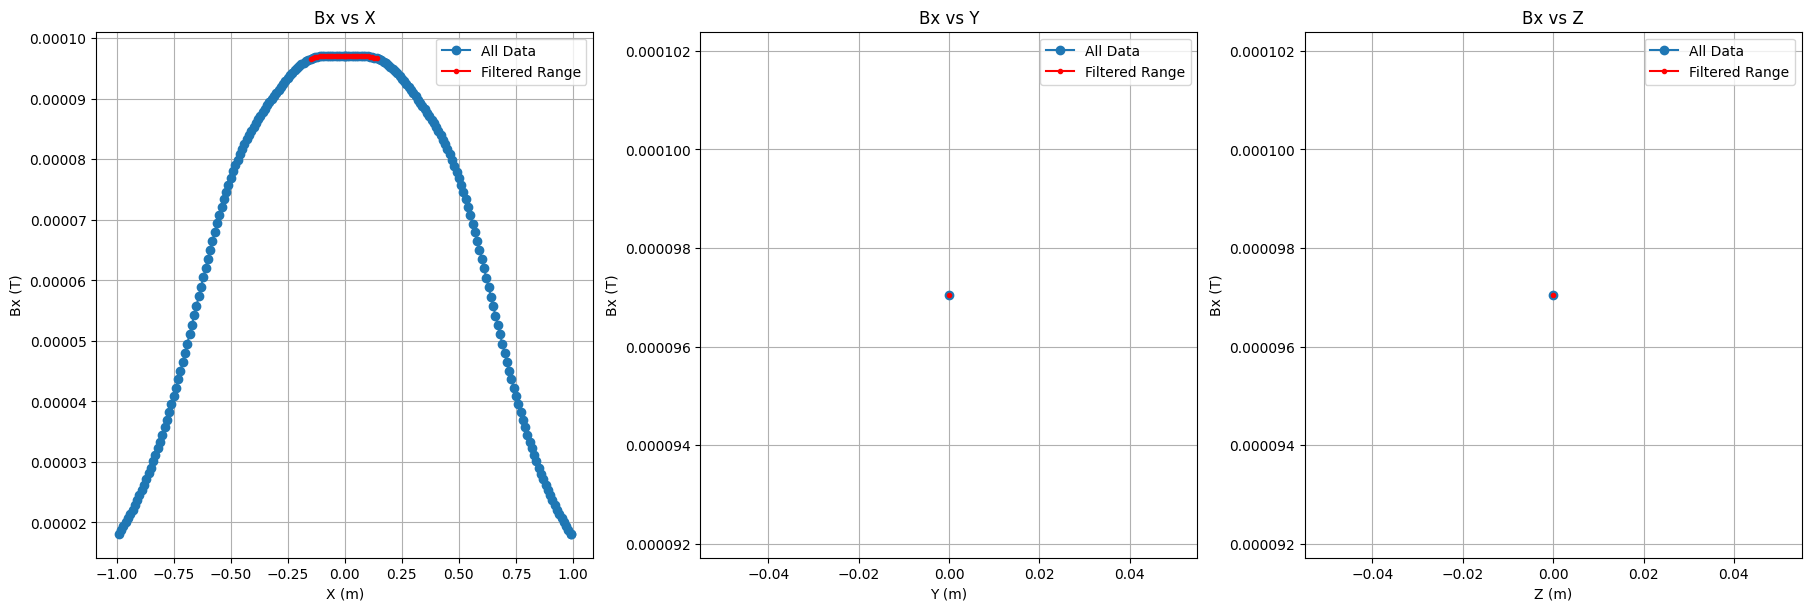

In [33]:
hplot.plot_mainAxis_field(x_coil_results_s, index='Bx')